In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 4
batch_size_test = 4

train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=256, crop=224)

encoding_dim = 2048
lr = 0.0001
n_epochs = 1

Loaded image shape in tensor: torch.Size([4, 3, 224, 224])


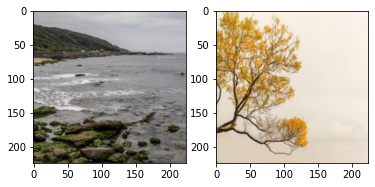

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))

print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr)
autoencoder.apply(init_weights)
#autoencoder = Autoencoder(224*224, encoding_dim)

C_Autoencoder_224(
  (encoder): C_Encoder_224(
    (enc_conv1): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU()
    (enc_conv2): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (relu2): ReLU()
    (enc_conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (relu3): ReLU()
    (enc_conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu4): ReLU()
    (enc_conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (relu5): ReLU()
    (enc_conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (relu6): ReLU()
    (enc_conv7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (relu7): ReLU()
    (enc_conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (relu8): ReLU()
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (encoder_lin): Sequential(
      (0): Linear(in_features=8192, out_feat

In [6]:
get_n_params(autoencoder)

NameError: name 'errr' is not defined

After conv1 torch.Size([4, 32, 112, 112])
After conv2 torch.Size([4, 32, 112, 112])
After conv3 torch.Size([4, 64, 56, 56])
After conv4 torch.Size([4, 64, 56, 56])
After conv5 torch.Size([4, 128, 28, 28])
After conv6 torch.Size([4, 128, 14, 14])
After conv7 torch.Size([4, 256, 7, 7])
After conv8 torch.Size([4, 512, 4, 4])
After flatten torch.Size([4, 8192])
After encoder_linear torch.Size([4, 2048])
DECODER
Start torch.Size([4, 2048])
After decoder_lin torch.Size([4, 8192])
After unflatten torch.Size([4, 512, 4, 4])
After transposed conv 1 torch.Size([4, 256, 7, 7])
After transposed conv 2 torch.Size([4, 128, 14, 14])
After transposed conv 3 torch.Size([4, 128, 28, 28])
After transposed conv 4 torch.Size([4, 64, 56, 56])
After transposed conv 5 torch.Size([4, 64, 57, 57])
After transposed conv 6 torch.Size([4, 32, 112, 112])
After transposed conv 7 torch.Size([4, 32, 113, 113])
After transposed conv 8 torch.Size([4, 3, 224, 224])
Shape : torch.Size([4, 3, 224, 224])


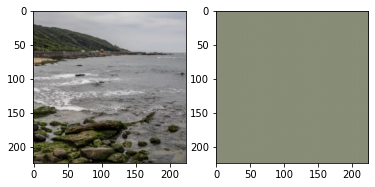

In [7]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)

In [ ]:

errr

In [ ]:
train_losses, val_losses = [], []

In [ ]:
%time t_l, v_l = train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=10)
train_losses.extend(t_l); val_losses.extend(v, l)

In [ ]:
x = next(iter(test_loader))

In [ ]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)